<a href="https://colab.research.google.com/github/KanishkaEkanayaka/CV/blob/main/Hand_Writing_recognizer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import EMNIST libraries which contain handwritten letters**

In [1]:
!git clone https://github.com/sorki/python-mnist/python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries contains handwritten letters!")

Cloning into 'mnist_get_data.sh'...
remote: Not Found
fatal: repository 'https://github.com/sorki/python-mnist/python-mnist/bin/mnist_get_data.sh/' not found
Imported the EMNIST libraries contains handwritten letters!


Now we have to extract letters from the emnist dataset (28 x 28 pixel 70000 grayscale images with value between 0 - 255 will be downloaded).

Next, we have to do following things



*   Normalization - each image pixel will the divided by 255 to normalize the value(0 - 1)
*   Splitting data in to training and testing sets
*   reshape the images







In [2]:
# Grab the data
X, y = extract_training_samples('letters')

# normalizing each pixel of each image
X = X / 255

# split the data into train test sets
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# reshape the arrays which contains image sets
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print('data processing completed')

data processing completed


Let's make sure that the data is downloaded

image label d


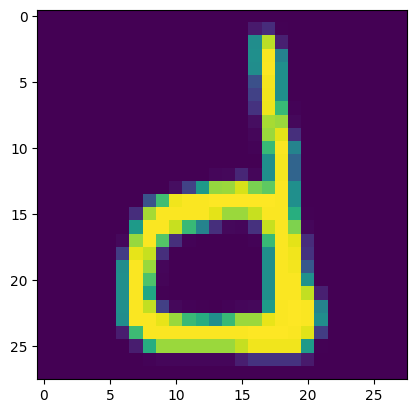

In [10]:
# import matplotlib
import matplotlib.pyplot as plt

img_index = 59999
img = X_train[img_index]
print('image label', str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

# **Build neural network**



*   In here we are going to stick on Multi Layer Percentron (MLP) neural network
*   In this neural network we use one hidden layer with 50 neurons to detect several parts of the neural network.
*   Train it for 20 epochs (backpropagation will happen 20 times)





In [13]:
# Import ML libraries needed
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, alpha=1e-4,
                     solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

print('mlp1 created')

mlp1 created


# **Let's fit the model and test it**

In [14]:
mlp1.fit(X_train, y_train)

print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732
Iteration 21, loss = 0.36703635
Iteration 22, loss = 0.36357559
Iteration 23, loss = 0.36073798
Iteration 24, loss = 0.35711691
Iteration 25, loss = 0.35309283
Iteration 26, loss = 0.34784002
Iteration 27, loss = 0.34588190
Iteration 28, loss = 0.34274738
Iteration 29, loss = 0.33743685
Iteration 30, loss = 0.33963232
Iteration 31, loss = 0.33302619
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.910800
Test set score: 0.843000


# **Evaluate the model**

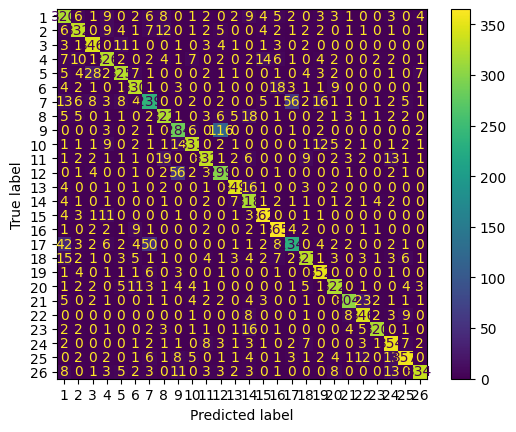

In [17]:
y_preds = mlp1.predict(X_test)

# Let's create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)


Let's create a way to see the mistaken letters

ThIS IS TO CHECK WHICH LETTERS WERE CONFUSED WHEN PREDICTING
Enter the predicted letter: u
ENTER the actual letter: v
There were 8 times that the letter v was predicted to be the letter u.
[404, 1438, 4352, 5489, 6180, 7581, 8787, 9619]
Enter mistake that you need to see the image2


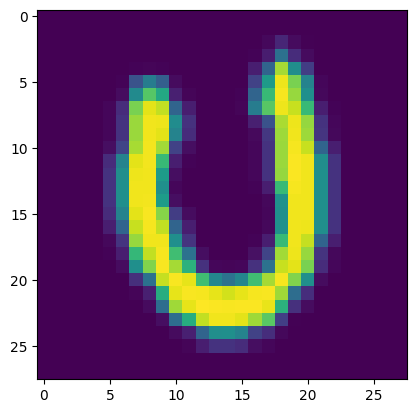

In [21]:
# STEP 3.3
def show_mistake(predicted_letter, actual_letter,y_test, y_pred):
  # This code counts all mistakes for the letters above
  mistake_list = []
  for i in range(len(y_test)):
    if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
      mistake_list.append(i)
  print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")
  return mistake_list

# Once we know how many mistakes were made, we can change this to see an image of a particular one

def show_mistake_image(mistake_to_show):
  # This code checks that the number mistake you asked for can be shown and if so, displays an image of it
  if (len(mistake_list)> mistake_to_show):
    img = X_test[mistake_list[mistake_to_show]]
    plt.imshow(img.reshape((28,28)))
  else:
    print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

print('ThIS IS TO CHECK WHICH LETTERS WERE CONFUSED WHEN PREDICTING')
predicted_letter = str(input('Enter the predicted letter: '))
actual_letter = str(input('ENTER the actual letter: '))

mistake_list = show_mistake(predicted_letter, actual_letter, y_test,y_preds)
print(mistake_list)

mistake_to_show = int(input('Enter mistake that you need to see the image'))

show_mistake_image(mistake_to_show)

Let's optimize our model

In [23]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.24960417
Iteration 2, loss = 0.57582422
Iteration 3, loss = 0.47712460
Iteration 4, loss = 0.42119700
Iteration 5, loss = 0.37742533
Iteration 6, loss = 0.35172146
Iteration 7, loss = 0.32579139
Iteration 8, loss = 0.31228887
Iteration 9, loss = 0.29365994
Iteration 10, loss = 0.27564187
Iteration 11, loss = 0.26868290
Iteration 12, loss = 0.25835369
Iteration 13, loss = 0.25163052
Iteration 14, loss = 0.24312246
Iteration 15, loss = 0.24075187
Iteration 16, loss = 0.23111640
Iteration 17, loss = 0.22104097
Iteration 18, loss = 0.21416220
Iteration 19, loss = 0.21403256
Iteration 20, loss = 0.21708334
Iteration 21, loss = 0.21309953
Iteration 22, loss = 0.21289312
Iteration 23, loss = 0.20577793
Iteration 24, loss = 0.19939089
Iteration 25, loss = 0.19255299
Iteration 26, loss = 0.19488160
Iteration 27, loss = 0.20555452
Iteration 28, loss = 0.19862351
Iteration 29, loss = 0.18967093
Iteration 30, loss = 0.18768209
Iteration 31, loss = 0.18818265
Iteration 32, los

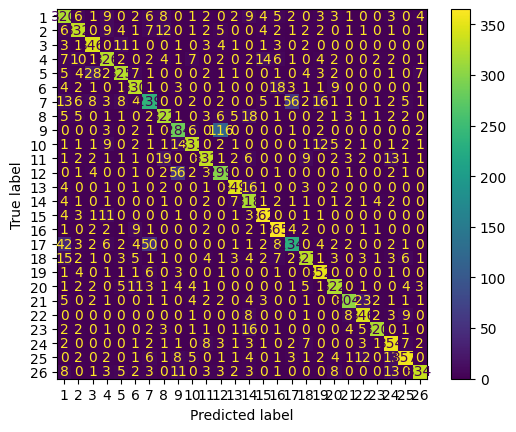

In [24]:
y_preds = mlp1.predict(X_test)

# Let's create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)